In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [2]:
# Load the penguins dataset

penguins = sns.load_dataset('penguins')
data = pd.get_dummies(penguins, dtype=int, drop_first=True)
data.dropna(inplace=True)
data.head(3)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_Chinstrap,species_Gentoo,island_Dream,island_Torgersen,sex_Male
0,39.1,18.7,181.0,3750.0,0,0,0,1,1
1,39.5,17.4,186.0,3800.0,0,0,0,1,0
2,40.3,18.0,195.0,3250.0,0,0,0,1,0


# Multiple Linear Regression - Example 1

Use all the columns to predict the body mass of a penguin

In [3]:
# Prepare the data
X = data.drop(columns=['body_mass_g'])
y = data.body_mass_g

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [4]:
multi_lr_model = LinearRegression()

multi_lr_model.fit(X_train,y_train)

LinearRegression()

In [5]:
multi_lr_model.coef_

array([  19.93319838,   71.83223193,   11.25854945, -248.83618106,
       1138.02563092,   54.64713164,    4.32595826,  418.50992518])

In [6]:
dict(zip(X.columns,multi_lr_model.coef_))

{'bill_length_mm': 19.933198384967366,
 'bill_depth_mm': 71.83223193311798,
 'flipper_length_mm': 11.258549446266294,
 'species_Chinstrap': -248.83618106176058,
 'species_Gentoo': 1138.0256309212793,
 'island_Dream': 54.64713163513458,
 'island_Torgersen': 4.325958255176791,
 'sex_Male': 418.50992518010327}

In [7]:
multi_lr_model.intercept_

-746.6771375239678

In [8]:
multi_lr_model.score(X_test,y_test)

0.8883315670255573

In [9]:
multi_lr_model.score(X_train, y_train)

0.8619047372225236

In [10]:
y_predicted = multi_lr_model.predict(X)

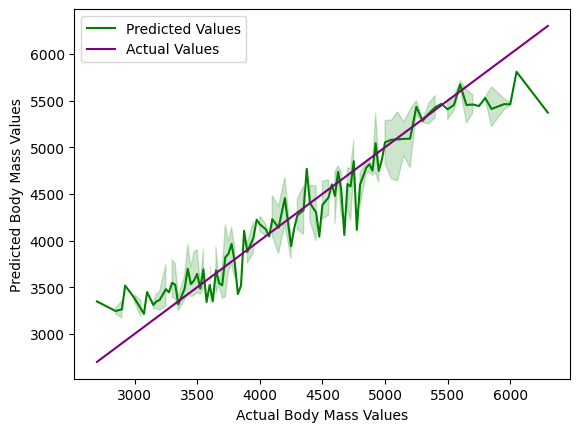

In [11]:
sns.lineplot(x=y, y=y_predicted, label='Predicted Values', color='green')
sns.lineplot(x=y, y=y, label='Actual Values', color = 'purple')
plt.xlabel('Actual Body Mass Values')
plt.ylabel('Predicted Body Mass Values');

# 2. Multiple Linear Regression - Example 2
##  L1 Regularization / LASSO Regression
  - Without scaling the features

In [12]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train,y_train)

Lasso(alpha=0.1)

In [13]:
dict(zip(X.columns,lasso.coef_))

{'bill_length_mm': 19.940243063433208,
 'bill_depth_mm': 71.19379916517559,
 'flipper_length_mm': 11.379949150189894,
 'species_Chinstrap': -248.10007090099165,
 'species_Gentoo': 1129.7083298073826,
 'island_Dream': 51.020365513216376,
 'island_Torgersen': 0.8255060976668744,
 'sex_Male': 418.1341100564109}

In [14]:
lasso.score(X_train,y_train)

0.8619020215718226

In [15]:
lasso.score(X_test,y_test)

0.888597419912012

In [16]:
lasso_predicted = lasso.predict(X)

In [17]:
col_list = X.columns

## LASSO Regression with Feature Scaling

Let's scale the features and try lasso

In [18]:
scaler = StandardScaler().fit(data)
data_scaled = scaler.transform(data)
X_scaled = data_scaled[:,[0,1,2,4,5,6,7,8]].reshape(-1,8)
y_scaled = data_scaled[:,3].reshape(-1,1)
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y_scaled, test_size=0.33, random_state=42)

In [19]:
lasso.fit(X_train_scaled, y_train_scaled)

Lasso(alpha=0.1)

In [20]:
lasso.coef_

array([ 0.        , -0.        ,  0.30781248, -0.        ,  0.4361433 ,
       -0.        , -0.        ,  0.23964033])

In [21]:
lasso.score(X_test_scaled,y_test_scaled)

0.8570915509787891

In [22]:
lasso.score(X_train_scaled, y_train_scaled)

0.8277231097458697

In [23]:
# Un-scaling the data and predicted values

predicted_lasso = lasso.predict(X_scaled)
predicted_data = pd.DataFrame(X_scaled, columns=col_list)
predicted_data.insert(3,'body_mass_g',predicted_lasso.reshape(-1,1))
predicted_df = pd.DataFrame(scaler.inverse_transform(predicted_data), columns=col_list.insert(3,'body_mass_g'))
predicted_df.head(2)


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_Chinstrap,species_Gentoo,island_Dream,island_Torgersen,sex_Male
0,39.1,18.7,181.0,3797.159072,0.0,0.0,0.0,1.0,1.0
1,39.5,17.4,186.0,3501.075407,0.0,0.0,0.0,1.0,0.0


In [24]:
# Inverse transforming the scaled data
original = pd.DataFrame(scaler.inverse_transform(data_scaled), columns =col_list.insert(3,'body_mass_g'))
original.head(2)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_Chinstrap,species_Gentoo,island_Dream,island_Torgersen,sex_Male
0,39.1,18.7,181.0,3750.0,0.0,0.0,0.0,1.0,1.0
1,39.5,17.4,186.0,3800.0,0.0,0.0,0.0,1.0,0.0


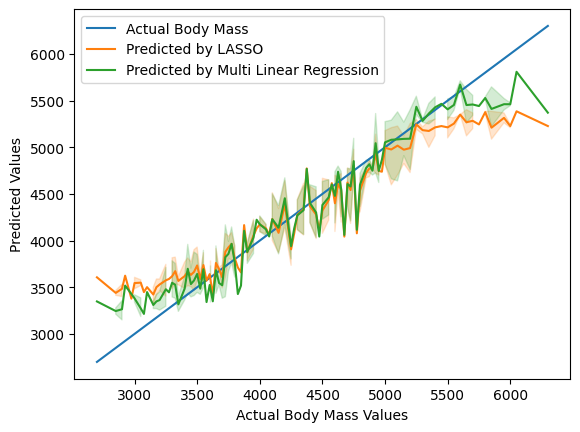

In [25]:
sns.lineplot(x=original.body_mass_g, y=original.body_mass_g, label='Actual Body Mass')
sns.lineplot(x=original.body_mass_g, y=predicted_df.body_mass_g, label='Predicted by LASSO')
sns.lineplot(x=original.body_mass_g, y=y_predicted, label = 'Predicted by Multi Linear Regression')
plt.xlabel('Actual Body Mass Values')
plt.ylabel('Predicted Values');

# 3. Multiple Linear Regression - Example 3
## L2 Regularization / Ridge Regression

In [26]:
ridge_model = Ridge(alpha=0.1)

In [27]:
ridge_model.fit(X_train, y_train)

Ridge(alpha=0.1)

In [28]:
ridge_model.coef_

array([ 2.05726947e+01,  6.86497943e+01,  1.17681902e+01, -2.57794346e+02,
        1.10236045e+03,  5.01531757e+01, -9.99159655e-01,  4.16837633e+02])

In [29]:
dict(zip(col_list,ridge_model.coef_))

{'bill_length_mm': 20.57269469001706,
 'bill_depth_mm': 68.64979432694066,
 'flipper_length_mm': 11.76819015855614,
 'species_Chinstrap': -257.7943459883366,
 'species_Gentoo': 1102.3604529283275,
 'island_Dream': 50.153175680616364,
 'island_Torgersen': -0.9991596552245707,
 'sex_Male': 416.8376329409116}

In [30]:
ridge_model.intercept_

-804.6930825549998

In [31]:
ridge_model.score(X_train,y_train)

0.8618794790938802

In [32]:
ridge_model.score(X_test,y_test)

0.8891043748192482

In [33]:
predicted_ridge = ridge_model.predict(X)

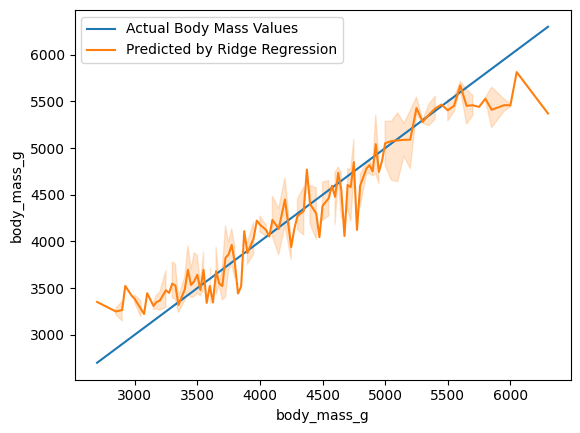

In [34]:
sns.lineplot(x=y, y=y, label='Actual Body Mass Values')
sns.lineplot(x=y, y=predicted_ridge, label='Predicted by Ridge Regression');

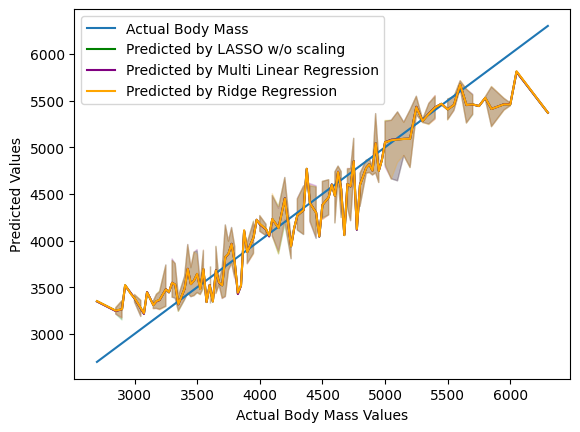

In [35]:
sns.lineplot(x=y, y=y, label='Actual Body Mass')
#sns.lineplot(x=y, y=predicted_df.body_mass_g, label='Predicted by LASSO w/ scaling', color='lightgreen')
sns.lineplot(x=y, y=lasso_predicted, label='Predicted by LASSO w/o scaling', color='green')
sns.lineplot(x=y, y=y_predicted, label = 'Predicted by Multi Linear Regression', color='purple')
sns.lineplot(x=y, y=predicted_ridge, label='Predicted by Ridge Regression',color='orange')
plt.xlabel('Actual Body Mass Values')
plt.ylabel('Predicted Values');

In [36]:
r2scores = [{'Perfect Model' : r2_score(y,y),
    'LASSO w/ Scaling' : r2_score(y,predicted_df.body_mass_g),
    'LASSO w/o Scaling': r2_score(y,lasso_predicted),
    'Multi Linear Regression' : r2_score(y,y_predicted),
    'Ridge': r2_score(y,predicted_ridge)}]
pd.DataFrame(r2scores, index=['r2_score'])

,Perfect Model,LASSO w/ Scaling,LASSO w/o Scaling,Multi Linear Regression,Ridge
r2_score,1.0,0.837966,0.870304,0.870224,0.870447


In [37]:
def rmse(a,b):
  return round(np.sqrt(mse(a,b)),2)

In [39]:
rmses = [{'Perfect Model' : rmse(y,y),
    'LASSO w/ Scaling' : rmse(y,predicted_df.body_mass_g),
    'LASSO w/o Scaling': rmse(y,lasso_predicted),
    'Multi Linear Regression' : rmse(y,y_predicted),
    'Ridge': rmse(y,predicted_ridge)}]
pd.DataFrame(rmses, index=['rmse'])

,Perfect Model,LASSO w/ Scaling,LASSO w/o Scaling,Multi Linear Regression,Ridge
rmse,0.0,322.34,288.39,288.48,288.23
